In [1]:
import numpy as np
import math
import PIL
import pandas as pd
import matplotlib.pyplot as plt
import os

In [9]:
folder="cppn_cma_opt"

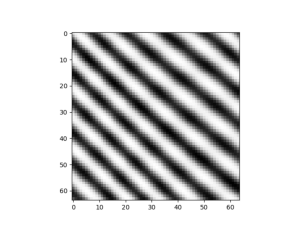

In [10]:
im=PIL.Image.open(folder+"/goal.png")
plt.axis("off")
plt.imshow(im)
im.close()

In [11]:
x=np.linspace(-7.96875,7.96875,64)
x= x.repeat(64)
x=x.reshape((64,64))
x=np.stack((x,x.transpose()),axis=2)

In [12]:
def ftype(matrix, kind):
    if kind<-0.5:
        return np.sin(matrix)
    elif kind<0.0:
        return np.cos(matrix)
    elif kind<.5:
        return np.exp((np.square(matrix/2)/-2))/(2*(2*math.pi)**.5)
    return matrix

In [13]:
def cppn(ex):
    h=np.matmul(x,ex[0:6].reshape((2,3))*2)
    h0=ftype(h[:,:,0],ex[18])
    (h[:,:,0].shape,"shape of h0")
    h1=ftype(h[:,:,1],ex[19])
    h2=ftype(h[:,:,2],ex[20])
    h = np.stack((h0,h1,h2),axis=2)
    h=np.matmul(h,ex[6:15].reshape((3,3))*2)
    h0=ftype(h[:,:,0],ex[21])
    h1=ftype(h[:,:,1],ex[22])
    h2=ftype(h[:,:,2],ex[23])
    h = np.stack((h0,h1,h2),axis=2)
    h=np.matmul(h,ex[15:18].reshape((3,1))*2)
    return 1/(1 + np.exp(-h))

In [14]:
my_csv = None
for f in os.listdir(folder):
    if f[-4:] == ".csv":
        my_csv = f
ar=pd.read_csv(f"{folder}/{my_csv}")
ar.sort_values(by=["objective"], ascending=False ,inplace=True)
pics = [cppn(i) for i in ar[ar.columns[6:]].head(36).to_numpy()]

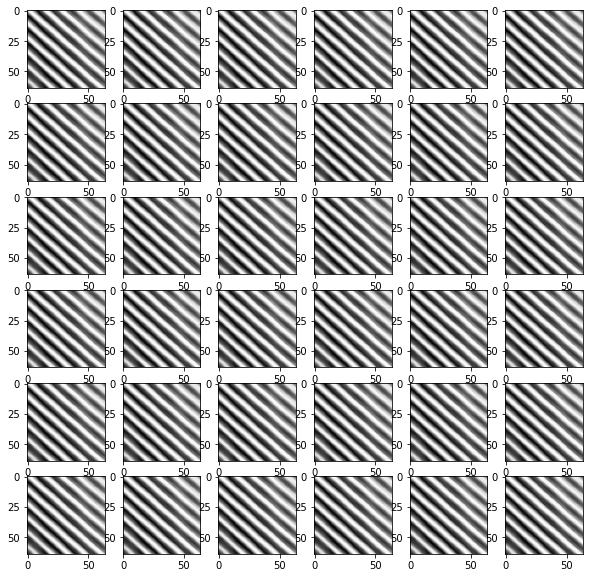

In [15]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Best Images")
for i,p in enumerate(pics):
    plt.subplot(6,6,i+1)
    plt.imshow(p, cmap='Greys_r')

In [40]:
len(pics)


36